# Project: Movie Recommender



## Team Members

Hendrik van den Berg

Neo Ntsako Mashele
 
Tracy Zanele Lushaba
 
Lwazi Cele
 
Botseetsa Loveness Nkadimeng
 
Collen Bothma

<a id= "cont"></a>
## Table of Contents

<a href=#one>1. Introduction</a>

<a href=#two>2. Problem Statment</a>

<a href=#three>3. Import Python Modules</a>

<a href=#four>4. Reading the Data</a>

<a href=#five>5. Exploratory Data Analysis</a>

<a href=#six>6. Data Visualization</a>

<a href=#seven>7. Data Preprocessing</a>

<a href=#sevenone>7.1 Preprocessing: ratings dataset</a>

<a href=#seventwo>7.2 Preprocessing: movies dataset</a>

<a href=#eight>8. Model Builing</a>

<a href=#nine>9. Model Evaluation</a>

<a href=#ten>10. Kaggle submition</a>

<a href=#eleven>11. Recomender systems</a>

<a href= #elevenone>11.1 Content Based Filtering</a>

<a href= #eleventwo>11.2 Collaborative Filtering</a>

<a href=#twelve>12. Conclusion</a>

<a id= "one"></a>
## 1. Introduction
<a href= #cont>Back to table of contents</a>

Introduction to the project


<a id= "two"></a>
# 2. Problem Statment
<a href= #cont>Back to table of contents</a>

Problrm to be solved

### Start Comet.ml Experiment.
This is to ensure version control for the machine learning models.


In [1]:
# Import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="yeeIKreBkd61jeuRdNjFOeSFr",
    project_name="general",
    workspace="henre7860",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/henre7860/general/ec6c1e89602d49f8915a18ec70b7981c



<a id= "three"></a>
## 3. Import Python Libraries
<a href= #cont>Back to table of contents</a>

In order to effectively manipulate the data we need the right tools for the job. Below we will import the necessary libraries that we will be using to be able to manipulate and visualize the data and to build machine learning models as well.

In [1]:
# Import packages

# Data analysis libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Libraries to create models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity

# Save trained models
import pickle


import warnings
warnings.filterwarnings('ignore')

<a id= "four"></a>
## 4. Reading the Data
<a href= #cont>Back to table of contents</a>

Below we will import the necessary datasets to be able to complete the project by using pd.read_csv(). To be able to store this project on GitHub the original “train.csv: file was split into four subsets (“ratings_1.csv”, “ratings_2.csv”, “ratings_3.csv”, “ratings_4.csv”), so that the file size fulfills the requirement to upload files to GitHub. These four datasets are then combined to form the complete daset again simply called “ratings”. The “movies.csv” dataset is also uploaded for additional information.


In [3]:
# Import Datasets

# train.csv was split into four smaller csv files in order to be uploaded to GitHub
ratings_1 = pd.read_csv('data/ratings_1.csv')
ratings_2 = pd.read_csv('data/ratings_2.csv')
ratings_3 = pd.read_csv('data/ratings_3.csv')
ratings_4 = pd.read_csv('data/ratings_4.csv')

# Add ratings together to form complete dataset

ratings= ratings_1.append(ratings_2).append(ratings_3).append(ratings_4)

movies = pd.read_csv("data/movies.csv")


# Diplay whole column.
#pd.set_option('display.max_column', None)   # Diplay whole column.
#pd.set_option('display.max_row', None)

<a id= "five"></a>
## 5. Exploratory Data Analysis
<a href= #cont>Back to table of contents</a>

Exploratory data analysis (EDA) is used by data scientists to analyze datasets and to find the main characteristics of the data to better identify the quality of the data. By doing EDA it may help us to manipulate the data to find the best answer to a proposed question.

Important features to find:

- Samples of the datasets
- Shape of the datasets
- Columns/features
- Information of the datasets
- Check for null values
- Unique values


#### Top 5 Records of the Data


In [4]:
# Sample of the ratings dataset.

ratings.head()


,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [5]:
# Sample of the movie dataset.

movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#### Shape of the Data

In [6]:
# Display the shape of the data

print("ratings:", ratings.shape)
print("movies: ", movies.shape)

ratings: (10000038, 4)
movies:  (62423, 3)


#### Columns/features in the data

In [7]:
# Display the column headings of the dataset
print("ratings : ", ratings.columns,end="\n\n")
print("movies : ", movies.columns,end="\n\n")


ratings :  Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

movies :  Index(['movieId', 'title', 'genres'], dtype='object')



#### Data Information


In [8]:
# Information of the ratings dataset.
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000038 entries, 0 to 2500037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 381.5 MB


In [9]:
# Information of the movie dataset.
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


#### Check for Null values

In [12]:
# Chech null values for each column
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [13]:
 # Chech null values for each column
movies.isnull().sum()  

movieId    0
title      0
genres     0
dtype: int64

#### Lenth of unique Features

In [17]:
# Number of unique Users in ratings dataset
print("The ratings dataset contains",ratings['userId'].nunique(), "unique users.")

The ratings dataset contains 162541 unique users


In [18]:
# Number of unique movies in ratings dataset
print("The ratings dataset contains", ratings['movieId'].nunique(), "unique movies.")


The ratings dataset contains 48213 unique movies.


In [22]:
# Number of unique ratings in train dataset
print("There are", ratings['rating'].nunique(), "unique ratings")


There are 10 unique ratings


In [23]:
# Number of unique movies in movie dataset
print("The movies dataset contains", movies['movieId'].nunique(), "unique movies.")


The movies dataset contains 62423 unique movies.


### Important Observations

There are a total of 48,213 Movies in the ratings dataset with 162,541 unique Users providing a total of 10,000,038 Ratings based on 10 unique Ratings. The dataset does not have any null values.

Important features:

- userId: Unique Id provided for each User
- movieId: Unique Id provided for each Movie
- Only movies with at least one rating or tag are included in the dataset.
- rating: Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).
- genres column include the following genres: 
<ul>
    <li>Action</li>
    <li>Adventure</li>
    <li>Animation</li>
    <li>Children’s</li>
    <li>Comedy</li>
    <li>Crime</li>
    <li>Documentary</li>
    <li>Drama</li>
    <li>Fantasy</li>
    <li>Film-Noir</li>
    <li>Horror</li>
    <li>Musical</li>
    <li>Mystery</li>
    <li>Romance</li>
    <li>Sci-Fi</li>
    <li>Thriller</li>
    <li>War</li>
    <li>Western</li>
    <li>(no genres listed)</li>

    
</ul>

<a id= "six"></a>
## 6. Data Visualization
<a href= #cont>Back to table of contents</a>

Below we will be looking at a visual distribution of some of the data.

We will be looking at the following distributions:

- Amount of released movies per year
- Amount of movies per genre


#### Movie Count per Year
From the movies dataset the year will be extracted from the title column, this will be plotted to see which year has the highest number of movie releases.

In [24]:
movies_copy = movies.copy()    # Create a copy of movies dataset

# Extract the year from title column.
movies_copy['year'] = movies_copy['title'].str.extract('.*\((.*)\).*',expand = False)


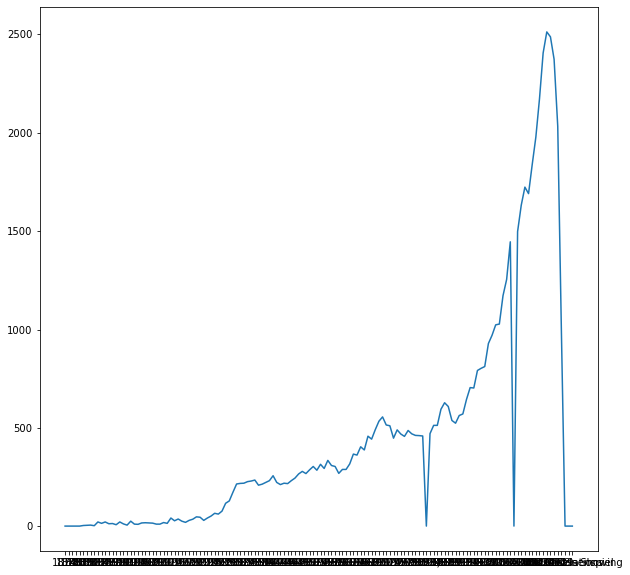

In [25]:
# Plot the graph of number of movies release per year.

plt.figure(figsize=(10,10))
plt.plot(movies_copy.groupby('year')['title'].count())
plt.show()


In [26]:
# Find the year that released the max number of movies.

# Group by year and count the number of movies per per
movies_per_year = movies_copy.groupby('year')['title'].count()

# Use .max() to find the largest amount of movies.
print(movies_per_year[movies_per_year == movies_per_year.max()])

# Generate descriptive statistics
movies_per_year.describe()

year
2015    2513
Name: title, dtype: int64


count     140.000000
mean      442.971429
std       576.979794
min         1.000000
25%        26.000000
50%       267.000000
75%       517.250000
max      2513.000000
Name: title, dtype: float64

The max of 2513 movies was released in the year 2015. We can also see that the average movies released per year is 442 movies.

#### Movie Count per Genre

First we will extract individual genres from the genres column. Each genre name will be in a separate column with a value of '1' if the movie has the genre and a value of '0' if not.

In [28]:
# Seperate the genres in the genre column

# Create an empty list to store the genres in
genre_list = []

# Iterate through the genres column row by row
for row in range(len(movies_copy['genres'])):
    # Iterate genre by genre and split the data on "|"
    for genre in movies_copy['genres'][row].split('|'):   
        # Select genre if the genre is not in the genre_list
        if genre not in genre_list: 
            # Add the genre to the genre_list
            genre_list.append(genre)    

# Print Genre names and number of genres
print('Genre Names:\n\n', genre_list)
print('\nNumber of genres:', len(genre_list))

Genre Names:

 ['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'IMAX', 'Documentary', 'War', 'Musical', 'Western', 'Film-Noir', '(no genres listed)']

Number of genres: 20


In [30]:
# Create a column for each genre

# Assign a numeric value of zero to all the genre columns
for genre in genre_list:
    movies_copy[genre] = 0

# Iterate row by row through the genre column
for i in range(len(movies_copy['genres'])):
    # Iterate genre by genre and split the data on "|"
    for x in movies_copy['genres'][i].split('|'):
        # Assign a value of one if the genre is included
        movies_copy[x][i]=1

In [31]:
 # Sample of the movies dataset to confirm the new genre coulumns
movies_copy.head()  

,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,1995,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Next we will create a dictionary of the movie count per genre.

In [32]:
# Create an empty dictionary
genre_dict ={}

# Iterate through the new genre columns
for i in movies_copy.columns[4:]:
    genre_dict[i]=movies_copy[i].value_counts()[1]
    print("{}    \t\t\t\t{}".format(i,genre_dict[i]))

Adventure    				4145
Animation    				2929
Children    				2935
Comedy    				16870
Fantasy    				2731
Romance    				7719
Drama    				25606
Action    				7348
Crime    				5319
Thriller    				8654
Horror    				5989
Mystery    				2925
Sci-Fi    				3595
IMAX    				195
Documentary    				5605
War    				1874
Musical    				1054
Western    				1399
Film-Noir    				353
(no genres listed)    				5062


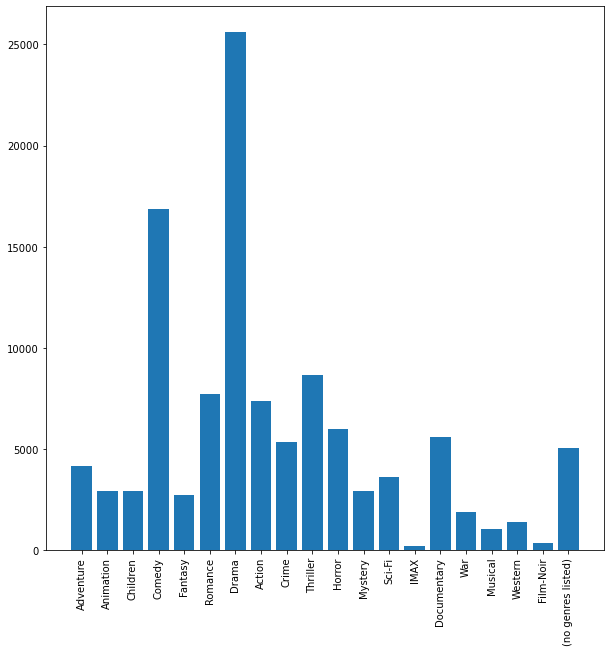

In [33]:
# Plot Movie count per Genre
plt.figure(figsize=(10,10))
plt.bar(height = genre_dict.values(), x = genre_dict.keys())
plt.xticks(rotation=90)
plt.show()

From the graph we can see that the genre 'Drama' is the most common genre for the movies in the dataset with 25606 movies followed by comedy with 16870 movies.

<a id= "seven"></a>
## 7. Data Preprocessing
<a href= #cont>Back to table of contents</a>

In machine learning data preprocessing refers to the process of manipulating and preparing the data so that we can use the data to train machine learning models. Data preprocessing is a crucial step as we are not always provided with a clean dataset to work with.

We are working with two datasets, the ratings and movies datasets. We already performed EDA on these datasets so now in the data preprocessing stage we can manipulate and format the datasets with the information we discovered in the EDA phase. 



<a id= "sevenone"></a>
### 7.1 Preprocessing: ratings dataset

Below we will be performing data preprocessing on the ratings dataset.

In [34]:
# Look at a sample of the data
ratings.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


The timestamp column does not really provide any useful information regarding the movie rating, thus we can drop this column.

In [36]:
# drop timestamp column
ratings.drop('timestamp',axis=1, inplace= True)   

In [37]:
# Look at a sample of the data
ratings.head()

,userId,movieId,rating
0,5163,57669,4.0
1,106343,5,4.5
2,146790,5459,5.0
3,106362,32296,2.0
4,9041,366,3.0


By looking at a sample of the data we can see that the timestamp column was dropped successfully.

<a id= "seventwo"></a>
### 7.2 Preprocessing: movies dataset

If we look at a sample of the movies dataset below we can see that the genres column contains all the genre categories for a movie in a single cell. The genres column will be split so that each genre is in its own column and a numerical value will be assigned to each genre if the movie contains the specific genre. A value of 1 means the movie falls into this genre and a value of 0 means the movie does not fall into this genre. 

In [40]:
# Look at a sample of the data
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#### "genre" column Split

Here we will split the genre categories on “|”, then we will create a new column called “genre_corpus” that contains a corpus of the genre categories.

In [42]:
# Isolate the genres column
genres = movies['genres']
# Iterate row by row and split the data on “|” and save it in a list
genres = [genre.split("|") for genre in genres]
# Create a “genre_corpus” column and assign the list of values to it
movies['genre_corpus']= genres
# Join the data in “genre_corpus” column with one empty space
movies['genre_corpus'] = movies.genre_corpus.apply(lambda x:" ".join(x))


In [43]:
# Look at a sample of the data
movies.head()

,movieId,title,genres,genre_corpus
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy,Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance,Comedy Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy,Comedy


We can see the genre_corpus column was created correctly and the individual genre are now joined by a empty space

#### Text to Numeric Transform

Next we need to create a column for each genre and assign a numeric value to it if the genre is included in the movie.

To accomplish this we will use the CountVectorizer method to transform the data. CountVectorizer is a tool provided by the scikit-learn library in Python. The CountVectorizer is used to extract features from text data, then a numeric value is assigned to each feature based on the frequency of each word. More information about CountVectorizer can be found [here](https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/#:~:text=CountVectorizer%20is%20a%20great%20tool,occurs%20in%20the%20entire%20text.&text=The%20value%20of%20each%20cell,in%20that%20particular%20text%20sample.).

In [44]:
# Initiate CountVectorizer
cvect = CountVectorizer() 
# fit and transform the data from the genre_corpus column and transform it to an array
vectors = cvect.fit_transform(movies['genre_corpus']).toarray()

In [45]:
# Create a dataframe or the vectorized data
genre_df = pd.DataFrame(vectors)
# Assign feature names to each column
genre_df.columns = cvect.get_feature_names()


Create a new dataset called movies_2 that contains the vectorized data.This dataset will consist of the original movies dataset and the vectorized dataset genre_df. Use pd.concat() to join the data, and drop the columns “genres” and “genre_corpus”, because they are no longer relevant.

In [46]:
# Add the datasets
movies_2 = pd.concat([movies, genre_df], axis=1)
# Drop columns
movies_2 = movies_2.drop(['genres', 'genre_corpus'], axis = 1)

In [48]:
# Look at a sample of the data
movies_2.head()

,movieId,title,action,adventure,animation,children,comedy,crime,documentary,drama,...,listed,musical,mystery,no,noir,romance,sci,thriller,war,western
0,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As we can see from the sample of the data that the datasets were joined correctly, thus we will be saving this dataset to a csv file, this will allow us to import this new dataset when needed without going through the preprocessing steps again.

In [41]:
# Save new dataset to csv
movies_2.to_csv('data/movies_2.csv', index = False)

<a id= "eight"></a>
## 8. Model Building
<a href= #cont>Back to table of contents</a>

In this section we will build multiple models in order to find the most accurate model, the accuracy of the model will be measured by the Root Mean Squared Error(RMSE). Now to build the model we split the dataset into training and testing datasets(testing size=20% of the actual data and use random_state = 42). To actually fit the model, we call the model.fit function and supply it the training input and output.

### 8.1 Train and Test Sets

We use train_test_split() from the scikit-learn library to split the dataset into training data and testing data. The training dataset will be used to train a model and the testing set will be used to test how accurate the model is on unseen data.

First we have to import the datasets that will be used to train and test the models, next the features and targets will be identified and separated and lastly the data will be split into training data and testing data.



In [2]:
# Import ratings data

ratings_1 = pd.read_csv('data/ratings_1.csv')
ratings_2 = pd.read_csv('data/ratings_2.csv')
ratings_3 = pd.read_csv('data/ratings_3.csv')
ratings_4 = pd.read_csv('data/ratings_4.csv')

# Add ratings together to form complete dataset

ratings = ratings_1.append(ratings_2).append(ratings_3).append(ratings_4)
ratings.drop('timestamp', axis=1, inplace= True)

# Import movie dataset with vectorized data
movies = pd.read_csv('data/movies_2.csv')

Next we have to merge the ratings and the movies dataset on “movieId”, this will create a dataset called train_df that includes the user ratings per movie and also the genre information that will be used to train the model.

In [3]:
train_df = ratings.merge(movies, on= 'movieId', how= 'left')

In [4]:
# Look  at a sample of the data

train_df.head()

,userId,movieId,rating,title,action,adventure,animation,children,comedy,crime,...,listed,musical,mystery,no,noir,romance,sci,thriller,war,western
0,5163,57669,4.0,In Bruges (2008),0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,106343,5,4.5,Father of the Bride Part II (1995),0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,146790,5459,5.0,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,106362,32296,2.0,Miss Congeniality 2: Armed and Fabulous (2005),0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,9041,366,3.0,Wes Craven's New Nightmare (Nightmare on Elm S...,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


From the sample of the train_df dataset we can see that the merge was successful.

Next we will identify the features and target of the dataset. The target variable is the “rating” column and the features are created by dropping the columns; 'movieId','rating','title' from train_df. Once the features and target are identified we can use train_test_split() to split the data into training and testing data.

In [78]:
# Identify features and target

# Features
X = train_df.drop(['movieId','rating','title'], axis=1)

# Target
y = train_df['rating']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state = 42)


In [79]:
X.columns

Index(['userId', 'action', 'adventure', 'animation', 'children', 'comedy',
       'crime', 'documentary', 'drama', 'fantasy', 'fi', 'film', 'horror',
       'imax', 'listed', 'musical', 'mystery', 'no', 'noir', 'romance', 'sci',
       'thriller', 'war', 'western'],
      dtype='object')

### 8.2 Model Training and Prediction

Below multiple models will be created and trained to create a prediction. Then model accuracy will be determined by the RMSE, we are aiming for a RMSE of less than 0.85.

Model building steps:
- Initialize model
- Fit the model with model.fit(X_train, y_train)
- Create Prediction with model.predict(X_test)
- Determine RMSE


#### Model 1: Linear Regression

small description

In [82]:
# Initialize model
lin_reg = LinearRegression()


# Fit the model
lin_reg.fit(X_train, y_train)


#Create Prediction 
y_pred_1 = lin_reg.predict(X_test)

# Determine RMSE
RMSE_1 = np.sqrt(mean_squared_error(y_test,y_pred_1))

print('RMSE:', RMSE_1)



Training time: 1.69s
RMSE: 1.0453174328237982


#### Model 2 : RandomForestRegressor

In [83]:
# Initialize model
forest = RandomForestRegressor(n_estimators=500,criterion= 'mse',max_depth= 8, max_features= 'auto',random_state=42)

# Fit the model
forest.fit(X_train, y_train)

#Create Prediction 
y_pred_2 = forest.predict(X_test)

# Determine RMSE
RMSE_2 = np.sqrt(mean_squared_error(y_test,y_pred_2))

print('RMSE:', RMSE_2)


RMSE: 1.03588180998901


#### Model 3: Lasso

In [84]:
# Initialize model
lasso_reg = Lasso()

# Fit the model
lasso_reg.fit(X_train, y_train)

#Create Prediction 
y_pred_3 = lasso_reg.predict(X_test)

# Determine RMSE
RMSE_3 = np.sqrt(mean_squared_error(y_test,y_pred_3))

print('RMSE:', RMSE_3)



RMSE: 1.0629570126475723


#### Model 4: XGBRegressor

In [85]:

# Initialize model
xgb_reg = XGBRegressor()


# Fit the model
xgb_reg.fit(X_train, y_train)

#Create Prediction 
y_pred_4 = xgb_reg.predict(X_test)



# Determine RMSE
RMSE_4 = np.sqrt(mean_squared_error(y_test,y_pred_4))

print('RMSE:', RMSE_4)



COMET WARNING: You must install graphviz to plot tree


Training time: 6.26s
RMSE: 1.0329400214467368


#### Model 5: SVD model form scikit-surprise

In [93]:
# Set the reader variable

reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(ratings,reader)


# Train Test Split method
X_train, X_test = train_test_split(data,test_size=0.2)

In [94]:
# Initialize model
SVD_model = SVD()

# Fit the model
SVD_model.fit(X_train)

#Create Predition
y_pred_5 = SVD_model.test(X_test)

# Determine RMSE
RMSE_5 = accuracy.rmse(y_pred_5)

print('RMSE:', RMSE_5)



RMSE: 0.8339
RMSE: 0.8338624642122856


<a id= "nine"></a>
## 9. Model Evaluation
<a href= #cont>Back to table of contents</a>

Below we will create a table of models and RMSE scores, from here we can compare the scores to determine which model is the most accurate.

In [95]:
#Create a dictionary of model names and RMSE scors
eval_dict = {
    "Model": ['LinearRegression', 'RandomForestRegressor', 'Lasso','XGBRegressor', 'SVD'],
    "RMSE": [RMSE_1, RMSE_2, RMSE_3, RMSE_4, RMSE_5]
}

# Create a DataFrame from the dictionary
eval_df = pd.DataFrame(eval_dict)
# Sort the Dataframe in ascending RMSE score
eval_df.sort_values('RMSE',ascending=True)  

,Model,RMSE
4,SVD,0.833862
3,XGBRegressor,1.032940
1,RandomForestRegressor,1.035882
0,LinearRegression,1.045317
2,Lasso,1.062957


As we can see from the table above the SVD model is the most accurate with a RMSE score of 0.833862, this model will thus be used to create a Kaggel submission, this model will be used to create the movie recommender system as well. 

 <a id="ten"></a>
## 10. Kaggle submission
<a href=#cont>Back to Table of Contents</a>

Below we will do the preprocessing and prediction on our Kaggel test data and save the submission to a csv file. For more information about this competition please visit [Kaggle](https://www.kaggle.com/c/202122-climate-change-belief-analysis/overview).

In [38]:
#Import data

test = pd.read_csv('data/test.csv')
movies_imdb_df = pd.read_csv('movies_imdb_df.csv')

# Merge datasets
test_df = test.merge(movies_imdb_df, how = 'left', on= 'movieId')

In [49]:

# Identify feature columns
test_col = test_df[['userId', 'year', 'Adventure', 'Animation', 'Children',
                   'Comedy','Fantasy', 'Romance', 'Drama', 'Action', 'Crime',
                   'Thriller', 'Horror','Mystery', 'Sci-Fi', 'IMAX', 'Documentary',
                   'War', 'Musical', 'Western','Film-Noir', '(no genres listed)']]


y_pred = xgb_reg.predict(test_col)
test_df['rating'] = y_pred

# Create Id column
#cols = ['userId', 'movieId']
#test_df['Id'] = test_df[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

submit_df = test_df[['Id', 'rating']]

#submit_df.to_csv('kaggel_sub/xgb_reg_sub.csv', index = False)

In [51]:
submit_df.to_csv('kaggel_sub/xgb_reg_sub.csv', index = False)

<a id= "eleven"></a>
## 11. Recommender Systems
<a href= #cont>Back to table of contents</a>

Recommender Systems is basically a system that takes the user's choice as input and predicts all the related movies, or news, books, etc.

In your daily life you would have seen Recommender System in Action while Scrolling on Youtube, Netflix and Amazon to just name a few.


<a id= "elevenone"></a>
### 11.1 Content Based Filtering

This type of filtering system recommends movies to you on the basis of what you actually like. Imagine you love to watch comedy movies so a content-based recommender system will recommend you other related comedy movies which belong to this category.

Steps Involved:

- Step 1. Import the Dataset

- Step 2. Data Processing Function

- Step 3. Model Building Function

- Step 4. Testing and Validation


In [ ]:
# Import data

movies = pd.read_csv('data/movies.csv')


#### Data Processing Function

We will create a function below to process the data in the movies dataset.

Processing Steps:
- Isolate the genres column
- Split the values in the genres columns on "|"
- Create a corpus of genres and join then with a space
- Call the count vectorizer function
- fit and transform the words in the genre_corpus

The function will return an array of numeric data that will be used to create movie recommendations.


In [ ]:
def content_data_processing(df):
    """
    create docstring
    """
    genres = df['genres']
    genres = [genre.split("|") for genre in genres]
    df['genre_corpus']= genres
    df['genre_corpus'] = df.genre_corpus.apply(lambda x:" ".join(x))
    cvect = CountVectorizer() 
    vectors = cvect.fit_transform(df['genre_corpus']).toarray()
    #print(vectors.shape)
    return vectors

#### Function to recommend Movies

Below we will create the model to recommend movies with Content Based Filtering. Our model should be capable of finding similarities between movies based on their genres.

This recommender model takes three movie titles as input and then predicts the top n similar movies.

To find the similarity between movies we will be using cosine similarity, this calculates the similarity of the movies based on the genres.

Modeling Steps:
- Identify the index of the movies
- Create a random subset of 50% of the dataset(dataset is too large to create the similarity matrix from complete dataset)
- Add the selected movies to the data subset
- Call the content_data_processing function on the data subset to create the count vectorizer
- Create the cosine similarity matrix of the vectorized data
- Calculate the similarity scores of the selected movies
- Sort the similarity scores of each movie in descending order
- Create a list of all the similarity scores
- Identify the indexes of the movies in the similarity scores list
- Store the top n movies in a list
- Return the recommended_movies list


In [ ]:
def content_model(movie_list, top_n):
    """
    Create docstring and comment
    """

    new_df = movies.copy()
    
    # Identify the index of the movies   
    movie_index_1 = new_df[new_df['title'] == movie_list[0]].index[0]
    movie_index_2 = new_df[new_df.title == movie_list[1]].index[0]
    movie_index_3 =  new_df[new_df.title == movie_list[2]].index[0]
    
    # Create a random subset of 50% of the dataset
    df_1 = new_df.sample(frac = 0.5)
    df_2 = new_df.iloc[[movie_index_1,movie_index_2,movie_index_3]]
    # Add the selected movies to the data subset
    df_2 = df_2.append(df_1)
    
    # Create the cosine similarity matrix of the vectorized data
    vectors = content_data_processing(df_2)
    similarity = cosine_similarity(vectors)
    
    # Calculate the similarity scores of the selected movies
    distances_1 = similarity[0]
    distances_2 = similarity[1]
    distances_3 = similarity[2]
    
    # Sort the similarity scores of each movie in descending order
    sim_score_1 = pd.Series(distances_1).sort_values(ascending = False)
    sim_score_2 = pd.Series(distances_2).sort_values(ascending = False)
    sim_score_3 = pd.Series(distances_3).sort_values(ascending = False)
    
    # Create a list of all the similarity scores
    sim_score_list = sim_score_1.append(sim_score_2).append(sim_score_3).sort_values(ascending = False)


    # Identify the indexes of the movies in the similarity scores list
    indexes = list(sim_score_list.index)
    
    # Store the top n movies in a list
    recommended_movies = []
    
    top_n = 10
    for i in indexes:
        
        if df_2.iloc[i].title not in movie_list and len(recommended_movies) < top_n:
            recommended_movies.append(df_2.iloc[i].title)
    
    # Return list of movies    
    return recommended_movies

#### Testing and Validation

Here we will test the function to recommend movies, a list of movies will be specified and the top 10 movies will be recommended.

In [ ]:
movie_list = ['Guardian Angel (1994)','Jack Frost (1979)','Wasteland No. 1: Ardent Verdant (2017)']

recommended_movies = content_model(movie_list, 10)

In [ ]:
recommended_movies

<a id= "eleventwo"></a>
### 11.2 Collaborative Filtering

Collaborative filtering is a method to create predictions based on what a user is interested in by collecting information, in this case the ratings of certain movies.


Steps Involved:

- Step 1. Import the Dataset
- Step 2. Load the Model
- Step 3. Function to predict ratings of Users
- Step 4. Function to maps users to movies
- Step 5. Function to Recommend Movies
- Step 6. Testing and Validation


In [ ]:
# Import data

movies = pd.read_csv('data/movies.csv')

ratings_1 = pd.read_csv('data/ratings_1.csv')
ratings_2 = pd.read_csv('data/ratings_2.csv')
ratings_3 = pd.read_csv('data/ratings_3.csv')
ratings_4 = pd.read_csv('data/ratings_4.csv')

# Add ratings together to form complete dataset

ratings= ratings_1.append(ratings_2).append(ratings_3).append(ratings_4)

In [ ]:
#Load svd model
model=pickle.load(open('SVD_model_small.pkl', 'rb'))

#### Function to predict ratings of Users

This function was provided by the Streamlit template that can be found on GitHub [here]. We will be providing our own model to use in this function, this model we loaded above is the SVD model that was trained in the model building stage <a href= #eight>here</a>.

In [ ]:
def prediction_item(item_id):
    """Map a given favourite movie to users within the
       MovieLens dataset with the same preference.

    Parameters
    ----------
    item_id : int
        A MovieLens Movie ID.

    Returns
    -------
    list
        User IDs of users with similar high ratings for the given movie.

    """
    # Data preprosessing
    reader = Reader(rating_scale=(0, 5))
    load_df = Dataset.load_from_df(ratings_df,reader)
    a_train = load_df.build_full_trainset()

    predictions = []
    for ui in a_train.all_users():
        predictions.append(model.predict(iid=item_id,uid=ui, verbose = False))
    return predictions


#### Function to maps users to movies

This function was provided by the Streamlit template that can be found on GitHub [here]. This function will use the predictions created in the previous function to create a list of user id’s.

In [ ]:
def pred_movies(movie_list):
    """Maps the given favourite movies selected within the app to corresponding
    users within the MovieLens dataset.

    Parameters
    ----------
    movie_list : list
        Three favourite movies selected by the app user.

    Returns
    -------
    list
        User-ID's of users with similar high ratings for each movie.

    """
    # Store the id of users
    id_store=[]
    # For each movie selected by a user of the app,
    # predict a corresponding user within the dataset with the highest rating
    for i in movie_list:
        predictions = prediction_item(item_id = i)
        predictions.sort(key=lambda x: x.est, reverse=True)
        # Take the top 10 user id's from each movie with highest rankings
        for pred in predictions[:10]:
            id_store.append(pred.uid)
    # Return a list of user id's
    return id_store

#### Function to Recommend Movies

Below we will create a function to recommend movies with collaborative filtering. This model should be capable of recommending movies based on how users rated similar movies.

This recommender model takes three movie titles as input and then predicts the top n similar movies.

Modeling Steps:

- Create a copy of the movies dataset
-Set the movieId column as the index
-Create a pandas Series from the title column
-Use the pred_movies() function to find user id
-Get movie IDs and ratings for top users
-Include predictions for chosen movies
-Remove duplicate entries
Create pivot table
-Fill Nan values with 0's and save the utility matrix in scipy's sparse matrix format
-Compute the similarity matrix using the cosine similarity metric
-Save the matrix as a data frame to allow for easier indexing
-Remove duplicate rows from matrix
-Transpose matrix
-Find IDs of chosen load_movie_titles
-Sort the similarity scores of each movie in descending order
-Create a list of all the similarity scores
-Identify the indexes of the movies in the similarity scores list
Removing chosen movies
-Get titles of recommended movies
-Return list of movies


In [ ]:
def collab_model(movie_list,top_n):
    """Performs Collaborative filtering based upon a list of movies supplied
       by the app user.

    Parameters
    ----------
    movie_list : list (str)
        Favorite movies chosen by the app user.
    top_n : type
        Number of top recommendations to return to the user.

    Returns
    -------
    list (str)
        Titles of the top-n movie recommendations to the user.

    """
    
    # Create a copy of the movies dataset
    new_df = movies_df.copy()
    # Set the movieId column as the index
    new_df.set_index('movieId',inplace=True)
    
    # Create a pandas Series from the title column
    indices = pd.Series(new_df['title'])
    # Use the pred_movies() function to find user id
    users_ids = pred_movies(movie_list)
    
    # Get movie IDs and ratings for top users
    df_init_users = ratings_df[ratings_df['userId']==users_ids[0]]
    for i in users_ids[1:]:
        df_init_users = df_init_users.append(ratings_df[ratings_df['userId']==i])
    
    # Include predictions for chosen movies
    for j in movie_list:
        a = pd.DataFrame(prediction_item(j))
        for i in set(df_init_users['userId']):
            mid = indices[indices == j].index[0]
            est = a['est'][a['uid']==i].values[0]
            df_init_users = df_init_users.append(pd.Series([int(i),int(mid),est], index=['userId','movieId','rating']), ignore_index=True)
    
    # Remove duplicate entries
    df_init_users.drop_duplicates(inplace=True)
    
    # Create pivot table
    util_matrix = df_init_users.pivot_table(index=['userId'], columns=['movieId'], values='rating')
    
    # Fill Nan values with 0's and save the utility matrix in scipy's sparse matrix format
    util_matrix.fillna(0, inplace=True)
    util_matrix_sparse = sp.sparse.csr_matrix(util_matrix.values)
    
    # Compute the similarity matrix using the cosine similarity metric
    user_similarity = cosine_similarity(util_matrix_sparse.T)
    
    # Save the matrix as a dataframe to allow for easier indexing
    user_sim_df = pd.DataFrame(user_similarity, index = util_matrix.columns, columns = util_matrix.columns)
    user_similarity = cosine_similarity(np.array(df_init_users), np.array(df_init_users))
    user_sim_df = pd.DataFrame(user_similarity, index = df_init_users['movieId'].values.astype(int), columns = df_init_users['movieId'].values.astype(int))
    
    # Remove duplicate rows from matrix
    user_sim_df = user_sim_df.loc[~user_sim_df.index.duplicated(keep='first')]
    
    # Transpose matrix
    user_sim_df = user_sim_df.T
    
    # Find IDs of chosen load_movie_titles
    idx_1 = indices[indices == movie_list[0]].index[0]
    idx_2 = indices[indices == movie_list[1]].index[0]
    idx_3 = indices[indices == movie_list[2]].index[0]
    
    # Find IDs of chosen load_movie_titles
    distances_1 = user_sim_df[idx_1]
    distances_2 = user_sim_df[idx_2]
    distances_3 = user_sim_df[idx_3]
    
    # Sort the similarity scores of each movie in descending order
    sim_score_1 = pd.Series(distances_1).sort_values(ascending = False)
    sim_score_2 = pd.Series(distances_2).sort_values(ascending = False)
    sim_score_3 = pd.Series(distances_3).sort_values(ascending = False)
    
    # Create a list of all the similarity scores
    sim_score_list = sim_score_1.append(sim_score_2).append(sim_score_3).sort_values(ascending = False)
    
    # Identify the indexes of the movies in the similarity scores list
    top_50_indexes = list(sim_score_list.iloc[1:50].index)
    
    # Removing chosen movies
    indexes = np.setdiff1d(top_50_indexes,[idx_1,idx_2,idx_3])
    
    # Get titles of recommended movies
    recommended_movies = []
    for i in indexes[:top_n]:
        recommended_movies.append(list(movies_df[movies_df['movieId']==i]['title']))
    
    # Return list of movies
    recommended_movies = [val for sublist in recommended_movies for val in sublist]
    return recommended_movies


#### Testing and Validation

Here we will test the function to recommend movies, a list of movies will be specified and the top 10 movies will be recommended.

In [ ]:
movie_list = ['Guardian Angel (1994)','Jack Frost (1979)','Wasteland No. 1: Ardent Verdant (2017)']
recommended_movies = collab_model(movie_list,top_n=10)

In [ ]:
recommended_movies

 <a id="twelve"></a>
## 12. Conclusion
<a href=#cont>Back to Table of Contents</a>

Business value and conclusion

End Commet.ml Experiment

In [ ]:
experiment.display()

In [96]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/henre7860/general/ec6c1e89602d49f8915a18ec70b7981c
COMET INFO:   Parameters:
COMET INFO:     begin_iteration          : 0
COMET INFO:     bootstrap                : True
COMET INFO:     ccp_alpha                : 0.0
COMET INFO:     copy_X                   : True
COMET INFO:     criterion                : mse
COMET INFO:     end_iteration            : 100
COMET INFO:     feature_names            : ['userId', 'action', 'adventure', 'animation', 'children', 'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'fi', 'film', 'horror', 'imax', 'listed', 'musical', 'mystery', 'no', 'noir', 'romance', 'sci', 'thriller', 'war', 'western']
COMET INFO:     feature_types            : ['int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'i